<a href="https://colab.research.google.com/github/kari-hub/Thyroidism-Project/blob/master/Data_science_cohort_3_core_Independent_project_week_8_Sarah_Wangari_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assesment Question

> Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

>  Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Part One: 

# Solution

>>Part 1: Decision trees:

For this section, we will build a model that makes the above prediction. 

We will not use individual decision trees, rather we will use at least 2 out of the 3 advanced models we have studied:
- Random forests
- Ada boosted trees
- Gradient boosted trees.

By trying and optimizing each of the 2 models and making sure to document how the hyperparameters are set up, we will be able to identify which of the 2 models we trust most, and use our model to determine which features are most impactful in influencing the prediction.

>> Part 2: SVM:

**- In this section, you may be required to clean the data a little bit so as to make sense of the features.**

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

**Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.**

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version.

## Defining the question

### a) Specifying the question

> 

### b) Defining the metric of success

### c) Understanding the context

### d) Recording the experimental design

### e) Data Relevance

### f) Appropriateness of data

## Reading the data

In [0]:
# Loading our libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
%matplotlib inline

In [0]:
# Ensuring that all our columns in our dataset are visible.

pd.set_option("display.max.columns", None)

In [0]:
# Reading our dataset

thyroid = pd.read_csv('/content/hypothyroid.csv')


## Checking Data

In [112]:
# Previewing the top of our dataset

thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [113]:
# Previewing the bottom of our dataset

thyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [114]:
# Determining the shape of our dataset

thyroid.shape

(3163, 26)

In [115]:
# Understanding our dataset

thyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

## Tidying the dataset

In [116]:
# Data Cleaning: Checking for duplicates

thyroid.duplicated().sum()

77

In [117]:
# Dropping duplicates in our dataset

thyroid.drop_duplicates()


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


In [118]:
# Checking for null values

thyroid.isna().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [0]:
# Changing the datatypes of our columns

le = LabelEncoder()

thyroid['sex'] = le.fit_transform(thyroid['sex'])
thyroid['on_thyroxine']= le.fit_transform(thyroid['on_thyroxine'])
thyroid['query_on_thyroxine']= le.fit_transform(thyroid['query_on_thyroxine'])
thyroid['on_antithyroid_medication']= le.fit_transform(thyroid['on_antithyroid_medication'])
thyroid['thyroid_surgery']= le.fit_transform(thyroid['thyroid_surgery'])
thyroid['query_hypothyroid']= le.fit_transform(thyroid['query_hyperthyroid'])
thyroid['query_hyperthyroid'] = le.fit_transform(thyroid['query_hyperthyroid'])
thyroid['pregnant']= le.fit_transform(thyroid['pregnant'])
thyroid['sick']= le.fit_transform(thyroid['sick'])
thyroid['tumor']= le.fit_transform(thyroid['tumor'])
thyroid['lithium']= le.fit_transform(thyroid['lithium'])
thyroid['goitre']= le.fit_transform(thyroid['goitre'])
thyroid['TSH_measured']= le.fit_transform(thyroid['TSH_measured'])
thyroid['T3_measured']= le.fit_transform(thyroid['T3_measured'])
thyroid['T4U_measured']= le.fit_transform(thyroid['T4U_measured'])
thyroid['FTI_measured']= le.fit_transform(thyroid['FTI_measured'])
thyroid['TBG_measured']= le.fit_transform(thyroid['TBG_measured'])
thyroid['TT4_measured']= le.fit_transform(thyroid['TT4_measured'])



In [120]:
# Checking the unique values in the columns with non-numerical values

thyroid['age'].unique()

array(['72', '15', '24', '77', '85', '64', '20', '42', '69', '75', '53',
       '59', '68', '50', '78', '65', '28', '43', '40', '84', '?', '83',
       '63', '73', '36', '27', '48', '71', '60', '34', '79', '62', '74',
       '32', '41', '70', '29', '5', '58', '35', '51', '22', '16', '44',
       '39', '47', '18', '17', '88', '56', '30', '45', '66', '52', '54',
       '80', '33', '38', '92', '67', '46', '13', '89', '61', '49', '26',
       '57', '31', '90', '81', '25', '37', '76', '87', '23', '55', '86',
       '98', '21', '97', '1', '6', '14', '82', '11', '19', '9', '12',
       '10', '8', '7', '4', '93'], dtype=object)

In [121]:
thyroid['status'].unique()

array(['hypothyroid', 'negative'], dtype=object)

In [122]:
thyroid['sex'].unique()

array([2, 1, 0])

In [123]:
thyroid['TSH'].unique()

array(['30', '145', '0', '430', '7.30', '138', '7.70', '21', '92', '48',
       '36', '15', '15.30', '25', '61', '28', '170', '54', '216', '56',
       '71', '46', '70', '34', '53', '9.40', '126', '10', '530', '35',
       '65', '57', '125', '23', '80', '117', '49', '66', '8.20', '150',
       '?', '18', '165', '164', '24', '90', '77', '19', '58', '100',
       '213', '17', '235', '153', '13', '31', '109', '260', '43', '12',
       '11', '55', '6.50', '20', '7.50', '14', '60', '140', '33', '8.70',
       '0.25', '10.70', '82', '45', '42', '41', '160', '16', '89', '44',
       '176', '6.40', '183', '29', '37', '39', '7.90', '59', '68', '38',
       '47', '143', '6.60', '288', '96', '0.50', '1.20', '1.90', '0.09',
       '3.10', '0.40', '0.85', '0.30', '0.90', '1.50', '4.60', '0.20',
       '5.80', '4', '1.40', '2', '2.60', '2.90', '0.80', '4.90', '10.30',
       '2.30', '0.70', '0.60', '1.30', '2.50', '5.10', '1.70', '2.70',
       '22', '8.10', '3.30', '5', '3.20', '1.80', '1.10', '0.4

In [124]:
thyroid['FTI'].unique()

array(['10', '17', '0', '6', '44', '23', '63', '32', '7.50', '61', '41',
       '76', '45', '34', '81', '11', '16', '46', '22', '12', '5', '47',
       '29', '37', '60', '8.40', '8.50', '24', '28', '7', '49', '36',
       '15', '9', '80', '53', '7.20', '68', '6.60', '48', '21', '14', '2',
       '20', '1.40', '56', '3', '51', '13', '43', '78', '52', '64', '26',
       '35', '31', '133', '3.40', '54', '8.90', '57', '5.50', '58', '55',
       '2.80', '66', '4', '40', '50', '8.70', '87', '89', '112', '123',
       '99', '92', '104', '69', '196', '107', '106', '74', '97', '?',
       '122', '84', '114', '124', '241', '119', '120', '136', '85', '127',
       '839', '137', '197', '96', '77', '108', '82', '72', '94', '91',
       '240', '121', '109', '79', '100', '98', '73', '117', '165', '103',
       '88', '101', '126', '132', '128', '143', '152', '141', '186',
       '113', '102', '125', '93', '105', '159', '188', '71', '149', '116',
       '83', '176', '161', '86', '140', '111', '158', '1

In [125]:
thyroid['T3'].unique()

array(['0.60', '1.70', '0.20', '0.40', '1.20', '1.10', '1.30', '1.90',
       '?', '0.80', '2.20', '1.50', '2.70', '2', '0.30', '2.10', '0.50',
       '0.70', '1', '1.40', '2.30', '2.40', '0.90', '1.80', '0', '2.80',
       '1.60', '6.70', '3.30', '3', '2.50', '2.60', '4', '9.80', '3.90',
       '3.40', '3.80', '4.50', '3.20', '3.70', '4.30', '2.90', '3.10',
       '3.50', '3.60', '6.60', '4.90', '8.90', '4.10', '5', '5.30',
       '7.60', '7.30', '4.20', '4.40', '5.10', '7', '0.10', '0.05',
       '4.70', '6.20', '5.50', '4.60', '6.10', '8.10', '5.20', '5.60',
       '4.80', '10.20', '8.60'], dtype=object)

In [126]:
thyroid['T4U'].unique()

array(['1.48', '1.13', '1', '1.04', '1.28', '1.19', '0.86', '1.05',
       '1.21', '1.02', '0.92', '1.29', '0.98', '1.08', '1.01', '1.18',
       '1.10', '1.27', '0.83', '1.11', '0.78', '1.39', '1.12', '0.93',
       '0.99', '0.90', '1.06', '0.68', '0.67', '1.14', '0.80', '0.96',
       '0.95', '1.46', '1.03', '0.97', '0.94', '1.09', '1.24', '1.23',
       '1.53', '1.26', '1.40', '1.17', '0.87', '0.61', '0.70', '1.07',
       '1.73', '1.45', '1.20', '0.89', '0.84', '0.91', '0.85', '1.35',
       '0.82', '1.50', '0.74', '1.71', '1.79', '0.73', '0.77', '1.25',
       '?', '0.88', '0.72', '0.31', '0', '0.79', '0.81', '0.71', '1.93',
       '1.32', '0.66', '1.68', '1.42', '1.70', '1.83', '1.41', '1.34',
       '1.65', '1.22', '0.75', '1.74', '0.69', '1.51', '0.76', '1.16',
       '0.35', '0.62', '0.54', '1.36', '1.33', '1.30', '0.48', '1.59',
       '1.75', '1.86', '1.38', '1.43', '1.62', '2.01', '0.30', '1.31',
       '1.15', '1.57', '0.55', '1.66', '0.52', '1.97', '1.47', '0.36',
       

In [127]:
thyroid['TT4'].unique()

array(['15', '19', '4', '6', '57', '27', '54', '34', '39', '7.60', '53',
       '38', '98', '44', '37', '81', '13', '17', '12', '50', '23', '14',
       '3.90', '52', '32', '30', '84', '10', '55', '24', '28', '11',
       '6.60', '31', '33', '41', '9', '78', '42', '8.10', '65', '16',
       '9.70', '46', '22', '61', '2.30', '21', '7.50', '18', '66', '25',
       '43', '2', '3', '58', '59', '71', '74', '56', '40', '20', '48',
       '230', '70', '4.10', '63', '5.30', '2.90', '62', '75', '68', '45',
       '47', '36', '80', '109', '8.60', '83', '82', '101', '76', '103',
       '112', '206', '110', '93', '79', '121', '?', '107', '88', '187',
       '254', '115', '113', '260', '117', '164', '97', '64', '129', '111',
       '106', '95', '87', '105', '90', '67', '134', '35', '193', '143',
       '130', '108', '86', '96', '92', '99', '216', '152', '125', '138',
       '194', '91', '120', '102', '170', '126', '116', '140', '94', '159',
       '85', '210', '89', '151', '247', '139', '153', '178

In [128]:
thyroid['TBG'].unique()

array(['?', '28', '34', '0', '19', '30', '25', '48', '39', '31', '16',
       '21', '37', '40', '27', '3.10', '38', '108', '20', '36', '17',
       '23', '35', '32', '63', '9.30', '15', '26', '33', '41', '110',
       '22', '43', '53', '80', '47', '29', '13', '24', '18', '45', '86',
       '50', '8.40', '52', '11', '12', '14', '65', '7.30', '8.50', '69',
       '122'], dtype=object)

In [129]:
#We will use length to calculate the number of columns with the question mark.
len(thyroid.loc[(thyroid['TSH'] =='?')
|
(thyroid['TSH']  =='?')
|
(thyroid['T3']  =='?')
|
(thyroid['age']  =='?')
|
(thyroid['TT4']  =='?')
|            
(thyroid['T4U']  =='?')
|             
(thyroid['FTI']  =='?')
|
(thyroid['TBG']  =='?')])

3161

This shows us that 3161 out of 3163 rows have question marks as unique values. That makes up for almost our whole dataset, hence we cannot drop them

In [0]:
#To verify the validity of the statement above, we will run to get the columns without the (?)
df = thyroid.loc[(thyroid['TSH'] !='?')
&
(thyroid['TSH']  !='?')
&
(thyroid['T3']  !='?')
&
(thyroid['age']  !='?')
&
(thyroid['TT4']  !='?')
&           
(thyroid['T4U']  !='?')
&             
(thyroid['FTI']  !='?')
&
(thyroid['TBG']  !='?')]

In [142]:
# Previewing the dataset without (?)

df

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
24,hypothyroid,40,1,0,0,0,0,0,0,0,0,0,0,0,1,70,1,0.40,y,3.90,1,0.83,1,5,1,28
37,hypothyroid,40,1,0,0,0,0,0,0,0,0,0,0,0,1,30,1,0.30,y,6.60,1,0.93,1,7,1,28


In [0]:
# Dropping the columns with (?) as unique values
 
data = thyroid.drop(['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'], axis=1)

In [144]:
# Previewing our dataset with dropped columns
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured
0,hypothyroid,72,2,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
1,hypothyroid,15,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
2,hypothyroid,24,2,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
4,hypothyroid,77,2,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0


In [179]:
# Determining the number of samples we have lost after dropping columns and the percentage value

lost = thyroid.shape[0] - data.shape[0]
percent = (lost / thyroid.shape[0]) * 100
print("Number of data samples lost: ", lost)
print("Percent of data samples lost: ", round(percent, 2))

Number of data samples lost:  446
Percent of data samples lost:  14.1


In [0]:
#For the ? marks , we will first convert them to null values , and then drop them

data = data.replace({'?':np.nan}).dropna()

In [148]:
# Previewing our datatypes

data.dtypes

status                       object
age                          object
sex                           int64
on_thyroxine                  int64
query_on_thyroxine            int64
on_antithyroid_medication     int64
thyroid_surgery               int64
query_hypothyroid             int64
query_hyperthyroid            int64
pregnant                      int64
sick                          int64
tumor                         int64
lithium                       int64
goitre                        int64
TSH_measured                  int64
T3_measured                   int64
TT4_measured                  int64
T4U_measured                  int64
FTI_measured                  int64
TBG_measured                  int64
dtype: object

In [0]:
# Converting our age column from object to integer

data['age'] = data['age'].astype(int)


In [159]:
# Determining the shape of our data after dropping columns with most (?) as unique values

data.shape

(2717, 20)

## Exploratory Analysis

## **Univariate Analysis**

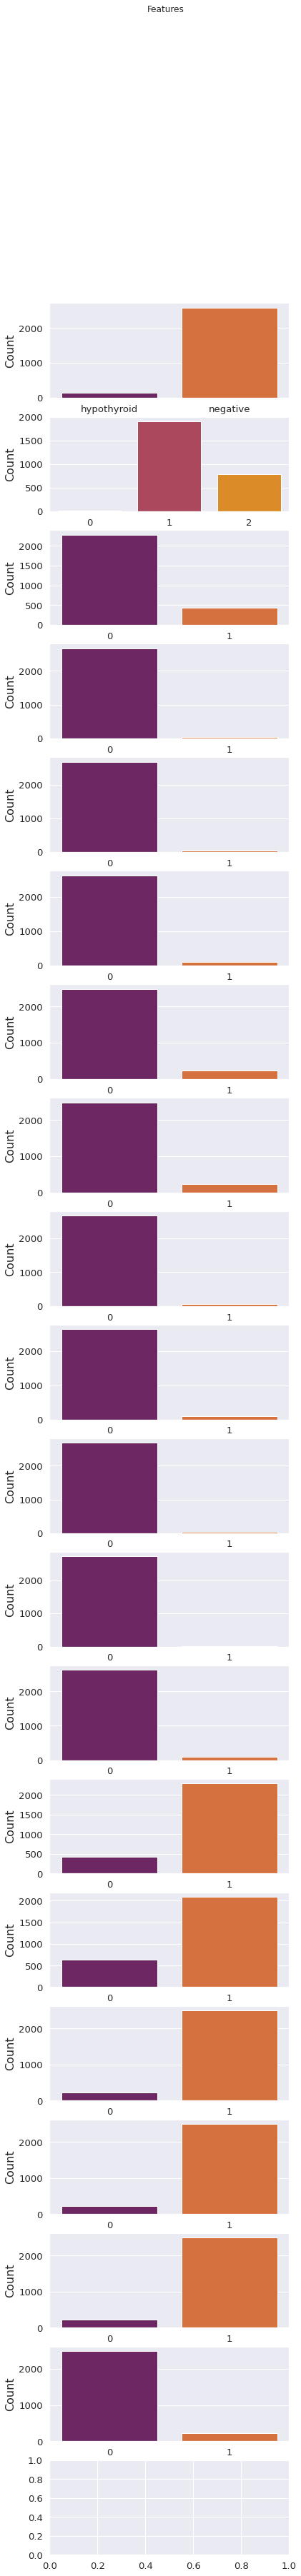

In [172]:
# Plotting subplots for our data

features = ['status', 'sex',	'on_thyroxine',	'query_on_thyroxine',\
            'on_antithyroid_medication',	'thyroid_surgery',	'query_hypothyroid',\
            'query_hyperthyroid', 'pregnant',	'sick',	'tumor',	'lithium',	'goitre',\
            'TSH_measured', 'T3_measured',	'TT4_measured', 'T4U_measured',	'FTI_measured',	'TBG_measured']

fig, (ax) = plt.subplots(20, 1, figsize=(6, 58))
fig.suptitle('Features')


for i, col_val in enumerate(features):
  sns.countplot(data[col_val], ax=ax[i], palette='inferno')
  ax[i].set_xlabel(f'{col_val}', fontsize=18, y=0.1)
  ax[i].set_ylabel('Count', fontsize=16)

 

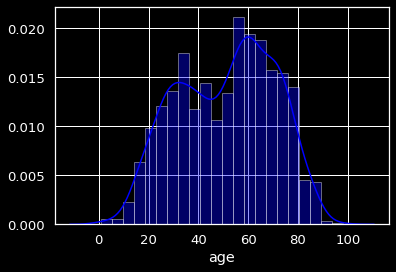

In [191]:
# Plotting a distplot to visaualize our age column

sns.distplot(data.age, color='blue');

In [173]:
# Determing the skewness of our data

data.skew()

age                          -0.162462
sex                           0.765775
on_thyroxine                  1.862320
query_on_thyroxine            7.492958
on_antithyroid_medication     8.518554
thyroid_surgery               5.220463
query_hypothyroid             3.038010
query_hyperthyroid            3.038010
pregnant                      6.566632
sick                          5.285766
tumor                         8.397863
lithium                      36.837466
goitre                        5.157230
TSH_measured                 -1.888867
T3_measured                  -1.256733
TT4_measured                 -3.073847
T4U_measured                 -3.082946
FTI_measured                 -3.092102
TBG_measured                  3.003036
dtype: float64

In [174]:
# Determining the kurtosis of our data

data.kurt()

age                            -0.960760
sex                            -0.907349
on_thyroxine                    1.469317
query_on_thyroxine             54.184309
on_antithyroid_medication      70.617746
thyroid_surgery                25.271839
query_hypothyroid               7.234831
query_hyperthyroid              7.234831
pregnant                       41.150942
sick                           25.958426
tumor                          68.574576
lithium                      1355.997053
goitre                         24.615139
TSH_measured                    1.568973
T3_measured                    -0.420932
TT4_measured                    7.454024
T4U_measured                    7.510084
FTI_measured                    7.566663
TBG_measured                    7.023395
dtype: float64

In [176]:
# Determining the standard deviation of our data

data.std()

age                          19.294405
sex                           0.465095
on_thyroxine                  0.366085
query_on_thyroxine            0.129035
on_antithyroid_medication     0.114364
thyroid_surgery               0.178995
query_hypothyroid             0.275090
query_hyperthyroid            0.275090
pregnant                      0.145779
sick                          0.177063
tumor                         0.115920
lithium                       0.027126
goitre                        0.180904
TSH_measured                  0.363670
T3_measured                   0.423501
TT4_measured                  0.272842
T4U_measured                  0.272276
FTI_measured                  0.271708
TBG_measured                  0.277313
dtype: float64

In [175]:
# Determining the variance of our data

data.var()

age                          372.274074
sex                            0.216314
on_thyroxine                   0.134018
query_on_thyroxine             0.016650
on_antithyroid_medication      0.013079
thyroid_surgery                0.032039
query_hypothyroid              0.075675
query_hyperthyroid             0.075675
pregnant                       0.021251
sick                           0.031351
tumor                          0.013437
lithium                        0.000736
goitre                         0.032726
TSH_measured                   0.132256
T3_measured                    0.179353
TT4_measured                   0.074443
T4U_measured                   0.074134
FTI_measured                   0.073825
TBG_measured                   0.076902
dtype: float64

## **Bivariate Analysis**

In [180]:
# Determining the correlation between our numerical data

data.corr()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured
age,1.000000,0.016643,-0.001552,-0.021606,-0.063665,-0.013207,-0.091812,-0.091812,-0.164818,0.068590,-0.065635,-0.021321,-0.038627,0.212235,0.186594,0.134630,0.132236,0.132853,-0.137705
sex,0.016643,1.000000,-0.141316,0.060712,-0.043301,-0.042628,-0.068524,-0.068524,-0.091272,0.022047,-0.003690,-0.016627,-0.088432,0.037781,0.103145,0.100600,0.099981,0.102273,-0.102629
on_thyroxine,-0.001552,-0.141316,1.000000,-0.033757,-0.024072,0.026167,-0.101266,-0.101266,-0.002778,-0.068300,-0.025131,-0.011818,-0.031477,0.082663,-0.160640,0.066575,0.066125,0.069375,-0.070126
query_on_thyroxine,-0.021606,0.060712,-0.033757,1.000000,-0.015207,0.023533,-0.039337,-0.039337,-0.019552,-0.024010,0.058426,-0.003562,0.006978,-0.116026,-0.082417,0.038953,0.038857,0.038760,-0.039719
on_antithyroid_medication,-0.063665,-0.043301,-0.024072,-0.015207,1.000000,-0.003462,0.094000,0.094000,0.004820,-0.021201,-0.013616,-0.003145,-0.021694,-0.012000,-0.004356,-0.036402,-0.036635,-0.036868,0.034585
thyroid_surgery,-0.013207,-0.042628,0.026167,0.023533,-0.003462,1.000000,0.026770,0.026770,-0.013466,-0.033864,-0.021748,-0.005024,-0.023281,0.045878,0.014898,0.017245,0.017031,0.016816,-0.018933
query_hypothyroid,-0.091812,-0.068524,-0.101266,-0.039337,0.094000,0.026770,1.000000,1.000000,0.065516,-0.054841,-0.035221,-0.008136,0.040064,-0.124686,-0.014429,-0.077813,-0.078380,-0.078950,0.087854
query_hyperthyroid,-0.091812,-0.068524,-0.101266,-0.039337,0.094000,0.026770,1.000000,1.000000,0.065516,-0.054841,-0.035221,-0.008136,0.040064,-0.124686,-0.014429,-0.077813,-0.078380,-0.078950,0.087854
pregnant,-0.164818,-0.091272,-0.002778,-0.019552,0.004820,-0.013466,0.065516,0.065516,1.000000,-0.027258,0.004282,-0.004044,0.083799,0.015631,0.040618,0.007196,0.007009,0.006822,-0.008662
sick,0.068590,0.022047,-0.068300,-0.024010,-0.021201,-0.033864,-0.054841,-0.054841,-0.027258,1.000000,-0.021497,-0.004966,-0.034251,0.050304,0.081503,0.031442,0.031260,0.031077,-0.032878


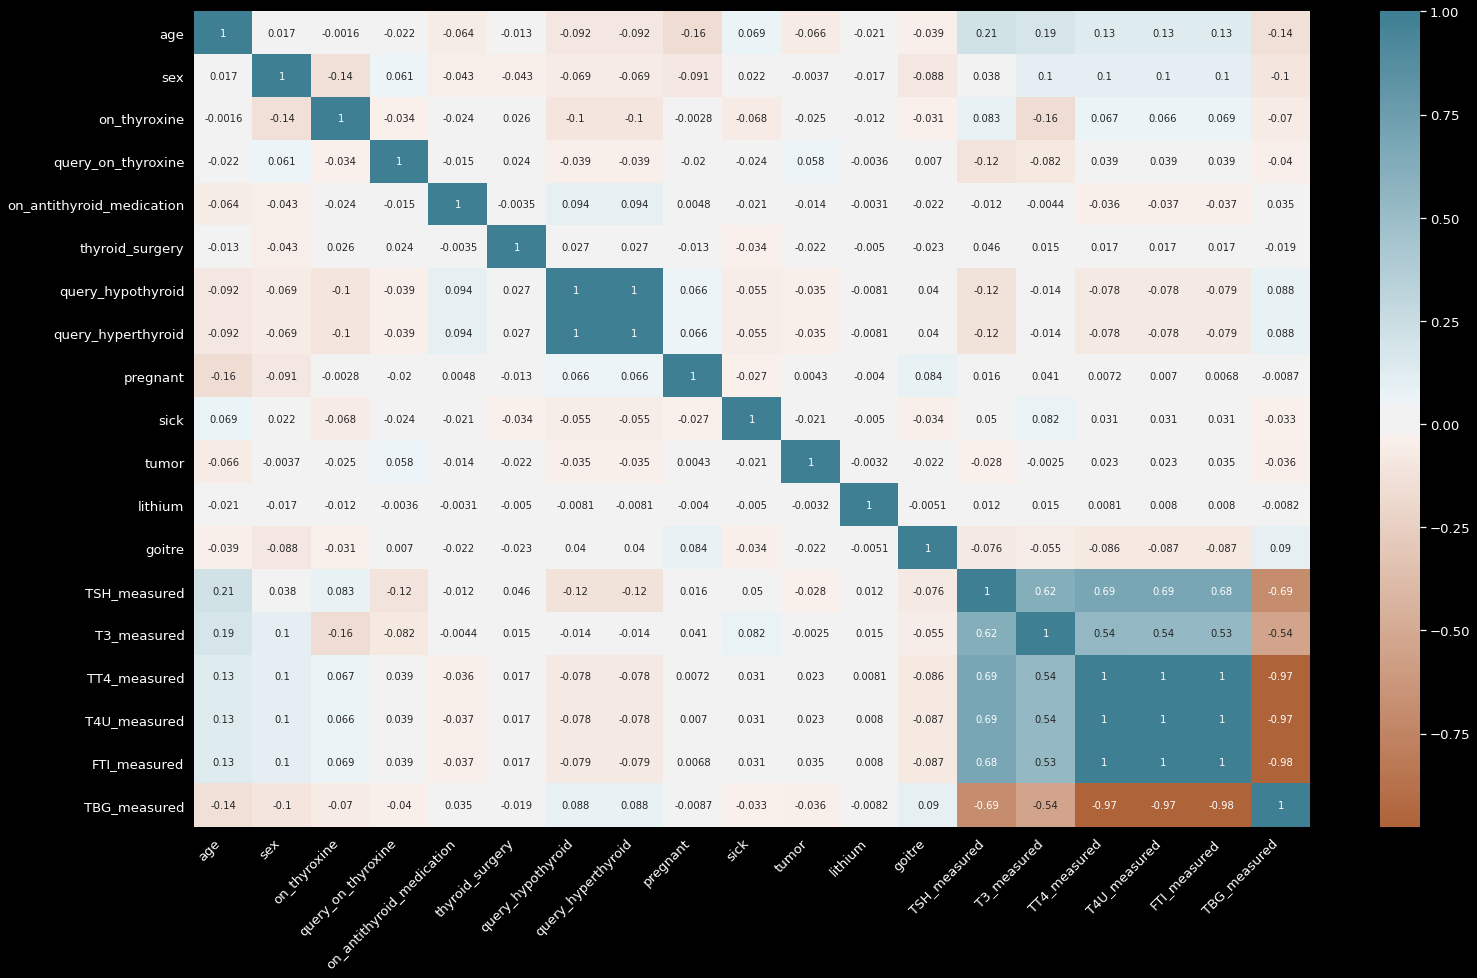

In [192]:
# Plotting our correlations on a heatmap

plt.figure(figsize= (25,15))
ax = sns.heatmap(data.corr(), cmap=sns.diverging_palette(30, 220, n=256), annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.show()

## Implementing the solution

i) Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM

ii) Part 2: SVM:

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 